In [1]:
%reload_ext autoreload
%autoreload 2 -p

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
from matplotlib.patches import ConnectionPatch

from manofunkcijos import PieOfPie

In [3]:
dus18 = '../../DATA/DUS2018.csv'
df18 = pd.read_csv(dus18)
df18

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,25.57,0,100,XC,0,1_49,40-49,20,A,0,...,N,183,2.51,LT,0,146,460,0,1,G2
1,25.05,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.13,LT,0,132,1487,0,2,G2
2,25.44,13,100,XC,0,1_49,40-49,26,A,0,...,N,183,8.20,LT,0,132,1500,0,3,G2
3,24.91,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.20,LT,0,132,1500,0,4,G2
4,24.51,18,100,XM,1,50_249,40-49,24,A,0,...,N,183,2.19,LT,0,0,400,0,5,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,10.64,9,100,XR,1,50_249,30-39,20,A,0,...,D,183,19.79,LT,0,0,3621,0,43160,G4
43160,10.79,3,100,XK,0,1_49,30-39,20,A,0,...,N,184,2.18,LT,0,0,402,0,43161,G2
43161,10.74,1,100,XK,0,1_49,40-49,20,A,0,...,N,183,2.45,LT,0,0,448,0,43162,G2
43162,10.86,9,100,XK,0,1_49,30-39,20,A,0,...,N,184,2.51,LT,0,0,462,0,43163,G3


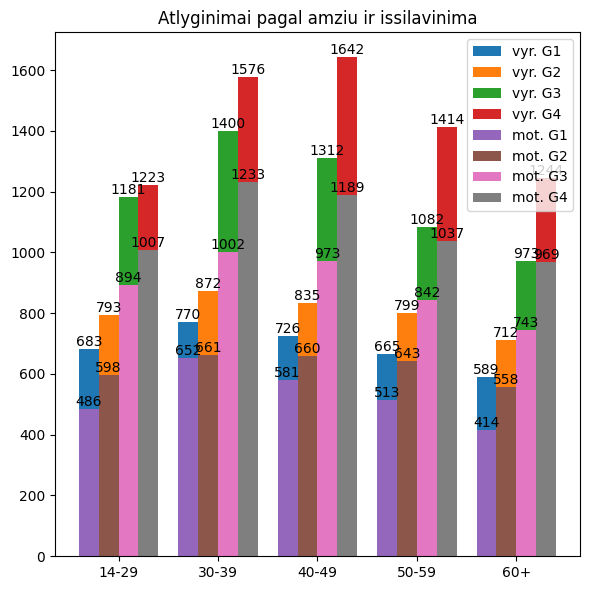

In [4]:
df = df18[['lytis', 'issilavinimas', 'amzius', 'bdu_spalio']]

edu = df['issilavinimas'].value_counts().index.sort_values()
amzius = df['amzius'].value_counts().index.sort_values()
lytis = df['lytis'].value_counts().index.sort_values()

atlmg1 = []
atlmg2 = []
atlmg3 = []
atlmg4 = []

atlfg1 = []
atlfg2 = []
atlfg3 = []
atlfg4 = []

for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G1') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg1.append(round(atl))

for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G2') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg2.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G3') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg3.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G4') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg4.append(round(atl))
    

for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G1') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg1.append(round(atl))
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G2') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg2.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G3') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg3.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G4') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg4.append(round(atl))

# print(atlmg1)


# for a in amzius:
#     for e in edu:
#         for l in lytis:
#             atl = df[(df['issilavinimas'] == e) & (df['amzius'] == a ) & (df['lytis'] == l)]['bdu_spalio'].mean()
#             print(f'{a:6} | {e:3} | {l} | {atl:.2f}')

a = np.arange(1,6)
w = 0.2
fig, axis = plt.subplots(figsize=(6, 6))

M1 = axis.bar(a-w*1.5, atlmg1, width=w, label='vyr. G1')
axis.bar_label(M1)

M2 = axis.bar(a-w*0.5, atlmg2, width=w, label='vyr. G2')
axis.bar_label(M2)

M3 = axis.bar(a+w*0.5, atlmg3, width=w, label='vyr. G3')
axis.bar_label(M3)

M4 = axis.bar(a+w*1.5, atlmg4, width=w, label='vyr. G4')
axis.bar_label(M4)


F1 = axis.bar(a-w*1.5, atlfg1, width=w, label='mot. G1')
axis.bar_label(F1)

F2 = axis.bar(a-w*0.5, atlfg2, width=w, label='mot. G2')
axis.bar_label(F2)

F3 = axis.bar(a+w*0.5, atlfg3, width=w, label='mot. G3')
axis.bar_label(F3)

F4 = axis.bar(a+w*1.5, atlfg4, width=w, label='mot. G4')
axis.bar_label(F4)

axis.set_xticks(a)
axis.set_xticklabels(amzius)
plt.title('Atlyginimai pagal amziu ir issilavinima')
fig.tight_layout()
axis.legend()
plt.show()

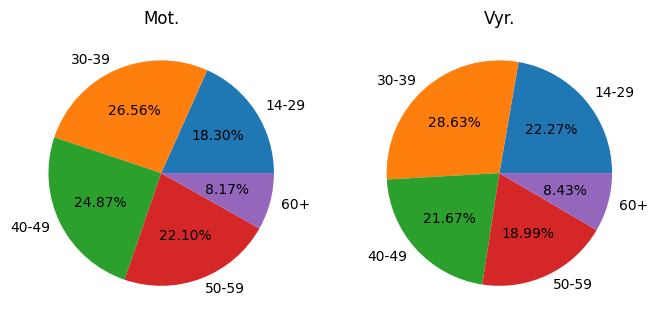

In [16]:
dus18 = pd.read_csv('../../DATA/DUS2018.csv')

df18 = dus18[['lytis', 'amzius', 'bdu_spalio']]
# df18.head()



vid_atl = df18['bdu_spalio'].mean()

fage = df18[(df18['lytis'] == 'F') & (df18['bdu_spalio'] > vid_atl)]['amzius'].value_counts().sort_index(ascending=True)
mage = df18[(df18['lytis'] == 'M') & (df18['bdu_spalio'] > vid_atl)]['amzius'].value_counts().sort_index(ascending=True)

# fage = df18.query('lytis == "F" and bdu_spalio > @vid_atl')['amzius'].value_counts().sort_index(ascending=True)
# mage = df18.query('lytis == "M" and bdu_spalio > @vid_atl')['amzius'].value_counts().sort_index(ascending=True)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4.5), gridspec_kw={'width_ratios':[1,1]})

ax1.set_title('Mot.')
ax1.pie(x=fage.values, labels=fage.index, autopct='%.2f%%')

ax2.set_title('Vyr.')
ax2.pie(x=mage.values, labels=mage.index, autopct='%.2f%%')

fig.tight_layout
plt.show()

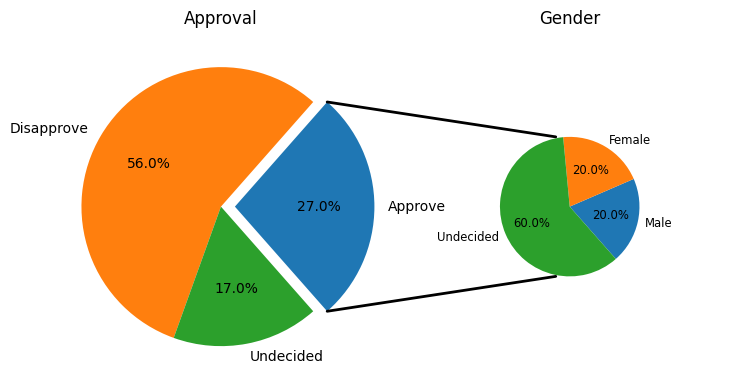

In [17]:
# parašykite funkciją,kuriai galėtumėte nurodyti savo norimus duomenis kaip list arba array
#  ir ji nubraižytų pie-of-pie tipo grafiką.
#  funkcijos pavadinimas PieOfPie(), argumentus, jų tipus parenkate patys

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html
# ir 
# https://stackoverflow.com/questions/59089531/generating-compound-pie-or-pie-of-pie-charts

# parašykite funkciją,kuriai galėtumėte nurodyti savo norimus duomenis kaip list arba array
#  ir ji nubraižytų bar-of-pie tipo grafiką.
#  funkcijos pavadinimas BarOfPie(), argumentus, jų tipus parenkate patys

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html

# BarOfPie(pie=[], bar=[], bar_labels=[], pie_labels=[])

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

# fig = plt.figure(figsize=(9, 5.0625))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# large pie chart parameters
ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# small pie chart parameters
ratios = [.20, .20, .60]
labels = ['Male', 'Female', 'Undecided']
width = .2

ax2.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, radius=0.5, textprops={'size': 'smaller'})

ax1.set_title('Approval')
ax2.set_title('Gender')

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, .5), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.5), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

Reloading 'manofunkcijos'.


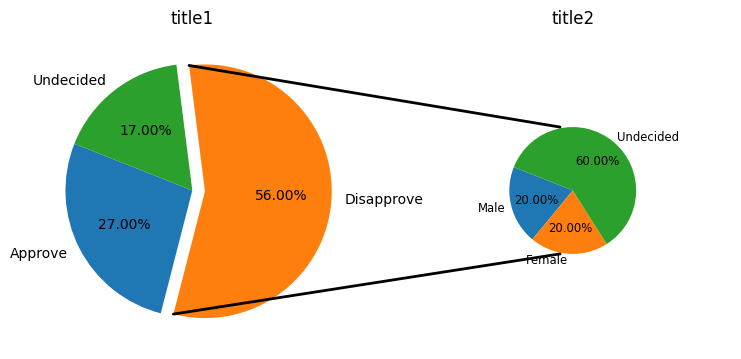

In [51]:
# large pie chart parameters
ratios1 = [.27, .56, .17]
labels1 = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]


# small pie chart parameters
ratios2 = [.20, .20, .60]
labels2 = ['Male', 'Female', 'Undecided']
width = .2


PieOfPie(ratios1, ratios2 ,labels1, labels2 )

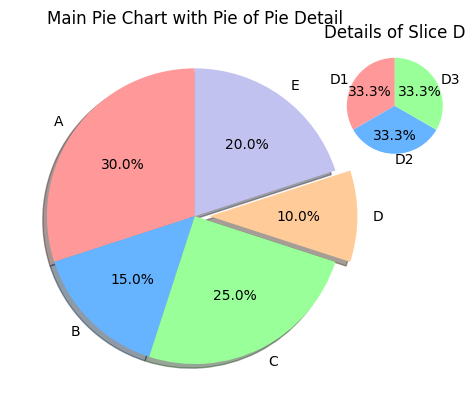

In [3]:
import matplotlib.pyplot as plt

# Data for the main pie chart
sizes = [30, 15, 25, 10, 20]  # Main pie chart slices
labels = ['A', 'B', 'C', 'D', 'E']  # Main pie chart labels

# Data for the secondary pie chart (Pie of Pie)
sizes_secondary = [10, 10, 10]  # Slices of the secondary pie chart
labels_secondary = ['D1', 'D2', 'D3']  # Labels for the secondary pie chart

# Exploding a slice to highlight
explode = (0, 0, 0, 0.1, 0)  # Only the slice 'D' is exploded

# Create a figure and axis
fig, ax = plt.subplots()

# Create the main pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    explode=explode,  # Highlight the slice 'D'
    autopct='%1.1f%%',  # Format for percentage display
    startangle=90,  # Start angle for the first slice
    shadow=True,  # Add shadow to the pie chart
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Custom colors
)

# Add a secondary pie chart for the exploded slice
# Find the index of the exploded slice 'D'
index_of_exploded_slice = 3  # 'D' slice index
secondary_pie = sizes[index_of_exploded_slice]

# Create a new subplot for the secondary pie chart
ax_inset = plt.axes([0.7, 0.6, 0.25, 0.25], aspect='equal')

# Plot the secondary pie chart
ax_inset.pie(
    sizes_secondary,
    labels=labels_secondary,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99']
)

# Set title for the secondary pie chart
ax_inset.set_title('Details of Slice D')

# Set the main pie chart title
ax.set_title('Main Pie Chart with Pie of Pie Detail')

# Show the plot
plt.show()


Reloading 'manofunkcijos'.
['G1', 'G2', 'G3', 'G4']
[9368, 9282, 9421, 10056, 5037]
['40-49', '50-59', '40-49', '50-59', '40-49', '40-49', '14-29', '50-59', '50-59', '30-39', '40-49', '30-39', '60+', '40-49', '14-29', '14-29', '14-29', '30-39', '30-39', '14-29', '14-29', '14-29', '30-39', '40-49', '30-39', '30-39', '30-39', '40-49', '30-39', '60+', '50-59', '14-29', '40-49', '50-59', '40-49', '14-29', '50-59', '14-29', '14-29', '50-59', '30-39', '14-29', '60+', '60+', '40-49', '40-49', '40-49', '40-49', '60+', '50-59', '14-29', '30-39', '14-29', '30-39', '14-29', '50-59', '50-59', '40-49', '14-29', '40-49', '14-29', '40-49', '30-39', '50-59', '60+', '14-29', '30-39', '30-39', '60+', '40-49', '50-59', '50-59', '60+', '40-49', '50-59', '60+', '60+', '40-49', '60+', '50-59', '60+', '14-29', '30-39', '40-49', '50-59', '60+', '30-39', '50-59', '50-59', '60+', '30-39', '50-59', '40-49', '40-49', '30-39', '40-49', '30-39', '40-49', '50-59', '40-49', '30-39', '40-49', '50-59', '60+', '14-29', 

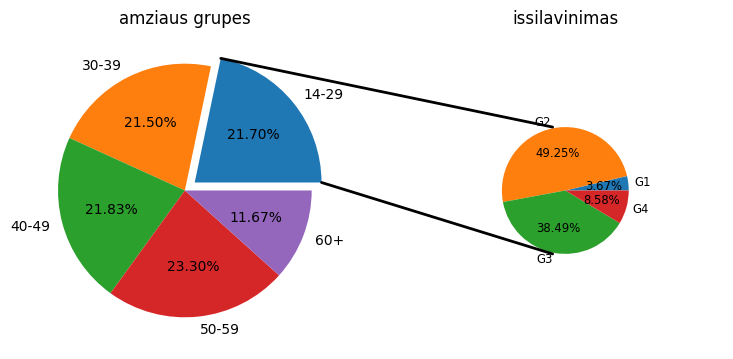

In [49]:
df18 = pd.read_csv('../../DATA/DUS2018.csv')[['amzius', 'issilavinimas', 'lytis']]
df_amz = df18[['amzius', 'issilavinimas']].groupby('amzius').count().reset_index()
amzius = df18['amzius'].value_counts().sort_index()
amziai = amzius.index.tolist()
kiekiai = amzius.values
edu = df18['issilavinimas'].value_counts().sort_index().index.tolist()

print(edu)

print(kiekiai.tolist())
print(df18['amzius'].tolist())

dfg = df18[df18['amzius'] == '14-29'][['issilavinimas', 'amzius']].groupby('issilavinimas').count().reset_index()
print(dfg['issilavinimas'].tolist())
print(dfg['amzius'].tolist())
# for amz in amziai:
#     for e in edu:


# fig, (ax1, ax2) = plt.subplots(1, 2)

# ax1.pie(df_amz['issilavinimas'], labels=df_amz['amzius'], autopct='%.2f%%')
# ax2.pie(kiekiai, labels=amziai, autopct='%.2f%%')
# plt.show()
name1 = 'amziaus grupes'
name2 = 'issilavinimas'

PieOfPie(kiekiai, amziai, dfg['amzius'], dfg['issilavinimas'])

In [47]:
zod = {
    '14-29':  {'G1': 100, 'G2':200, 'G3':300},
    '30-39': {'G1': 400, 'G2':500, 'G3':600}
}

print(zod['14-29'].values())

ex = []
print(ex)
for i  in range(0, len(kiekiai)):
    ex.append(0)
print(ex)
ex[0] = 0.1
print(ex)

dict_values([100, 200, 300])
[]
[0, 0, 0, 0, 0]
[0.1, 0, 0, 0, 0]
